In [46]:
#Data imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#plot import
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style ('whitegrid')
%matplotlib inline

#machine learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#for evaluating our ML results
from sklearn import metrics


In [25]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [26]:
#Loading the dataset
iris = load_iris()

In [27]:
X = iris.data
Y= iris.target

In [28]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
iris_data = DataFrame(X,columns=['sepal length','sepal width','petal length','petal width'])

In [30]:
iris_target = DataFrame(Y,columns =['Species'])

In [31]:
iris_data

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
iris_target

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [33]:
#Iris-Setosa
#Iris-Versicolour
#Iris-Virginica
        
def rename_type(x):
    if x == 0:
        return 'Setosa'
    elif x == 1:
        return 'Versicolour'
    else:
        return 'Virginica'
       

In [34]:
iris_target['Species'] = iris_target['Species'].apply(rename_type)

In [35]:
iris_target.head(5)

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [36]:
#concating both dataset
iris = pd.concat([iris_data,iris_target],axis=1)

In [37]:
iris.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


C:\Users\Davie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


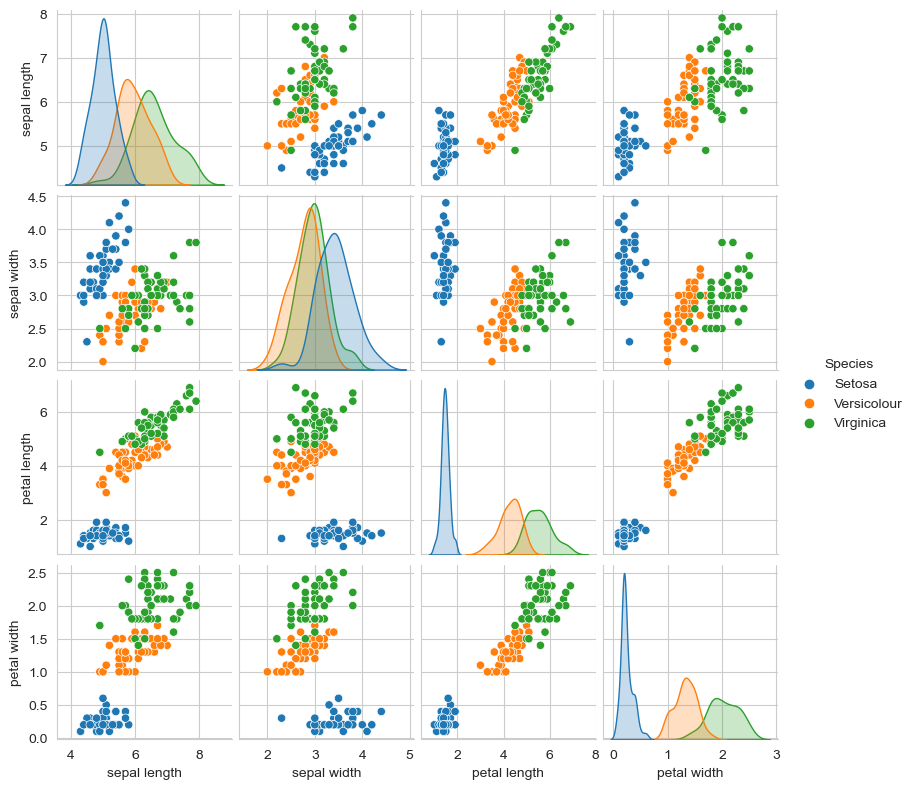

In [38]:
#visualization
sns.pairplot(iris,hue='Species',size=2)

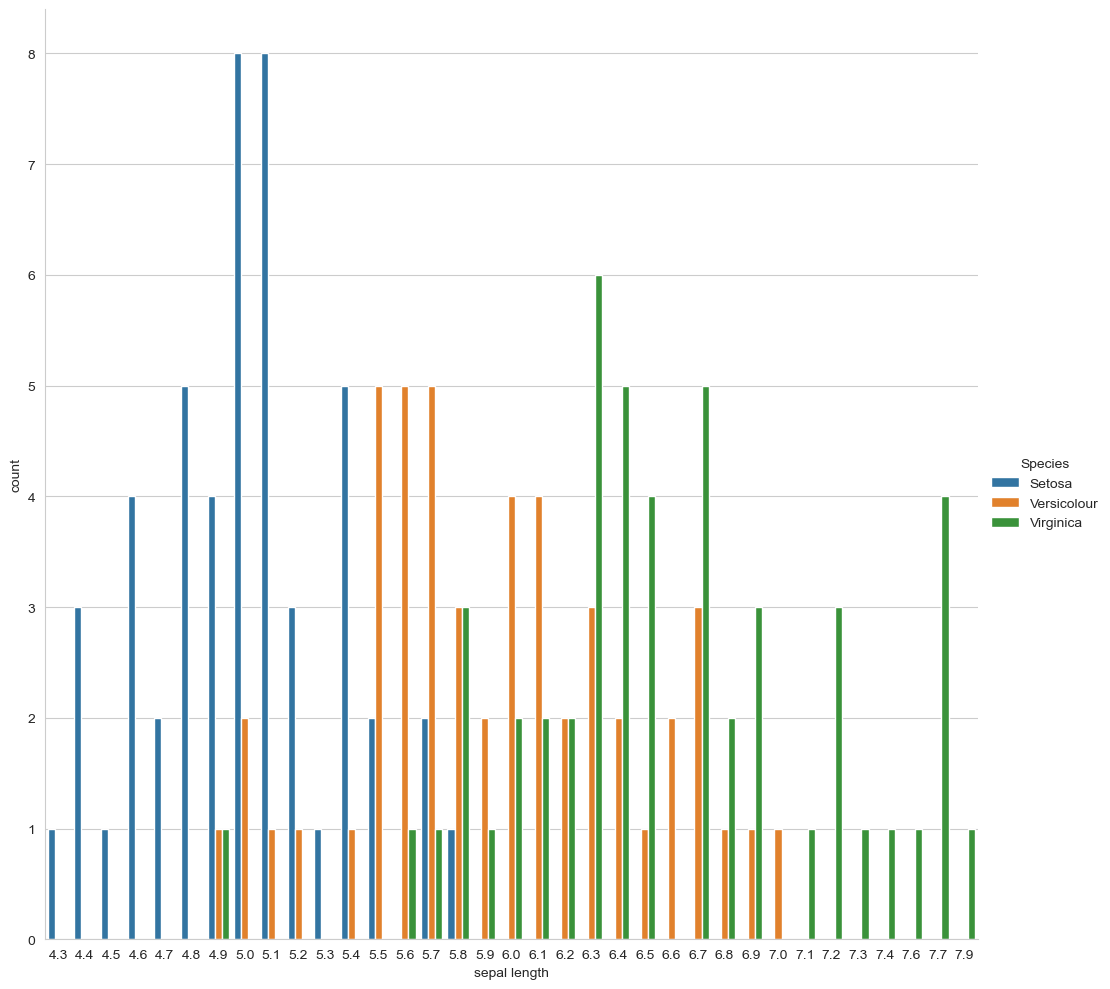

In [39]:
sns.catplot(x='sepal length', kind='count', hue='Species', data=iris,height=10)


In [59]:
#Training the model
log_reg = LogisticRegression(max_iter =1000)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.4, random_state=3)

log_reg.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [60]:
 #Testing the accuracy
Y_pred = log_reg.predict(X_test)

print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [62]:
#Implementing KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier(n_neighbors =6)

In [71]:
#fitting
knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)

In [72]:
#Testing the accuracy
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


In [75]:
#Cycle through various k values

#Test k values 1 through 20
k_range=range(1,21)
#set an empty list
accuracy = []

#irelate 
for k in k_range:
    knn =KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Testing Accuracy')

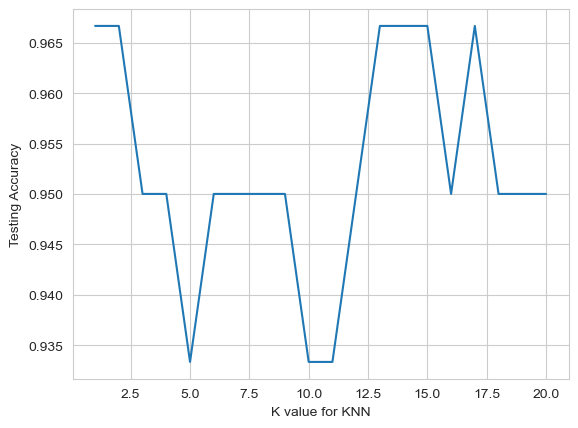

In [77]:
#plotting
plt.plot(k_range,accuracy)
plt.xlabel('K value for KNN')
plt.ylabel('Testing Accuracy')